### Step 3: Model Training and Testing
This notbeook is used for training and testing the dataset using several algorithms such as softmax regression,KNN, SVM Random Forest,and MLP

Loading the data as a pandas dataframe

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('extracted_features.csv') 

In [32]:
df.head(5)

,file_name,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label
0,pop.00027.wav,-75.463326,83.299210,10.706215,14.456715,14.260171,7.435577,5.284629,-0.401441,5.719382,...,0.325283,0.341221,0.313170,0.443056,0.400414,0.339016,0.419027,0.372709,0.422149,pop
1,pop.00033.wav,-69.112465,73.778976,-12.471774,9.525619,-0.051146,12.708080,3.162070,-0.102521,2.513747,...,0.337867,0.390890,0.429020,0.447938,0.532196,0.404587,0.419261,0.354290,0.476581,pop
2,pop.00032.wav,-113.258118,41.564148,21.545959,11.081444,17.457850,0.624119,3.016761,0.067581,3.470428,...,0.478151,0.477023,0.344526,0.388563,0.403329,0.491917,0.383729,0.390939,0.451360,pop
3,pop.00026.wav,-73.421997,97.422211,16.888651,-0.552833,7.178626,4.888375,0.737000,-5.553925,0.964399,...,0.246380,0.323797,0.267226,0.250600,0.542449,0.391026,0.345556,0.244526,0.342496,pop
4,pop.00030.wav,-18.320768,72.323654,-4.790904,-0.324024,1.718131,-0.866143,-1.290872,-0.335301,0.625273,...,0.371932,0.260325,0.373052,0.257145,0.290357,0.469181,0.320809,0.440710,0.283835,pop


Scaling the data and conducitng a 70:30 split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate the features into X and y 
X = df.drop(columns=['label', 'file_name'])
y_label = df['label']

# Create encodings for y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33
)

# Scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (700, 50)
X_test shape: (300, 50)
y_train shape: (700,)
y_test shape: (300,)


Running a SoftMax regression, which is just a multi-class logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
# Train multinomial logistic regression
log_model = LogisticRegression(
    solver='lbfgs',  
    max_iter=10000,
    random_state=66
)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#Accuracy over the test data
print("Accuracy:", accuracy)

print(" Logistic Regression Classification Report:\n", report)
# conducting a 5 fold cross-validation
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

Accuracy: 0.7366666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.88      0.94      0.91        32
           2       0.58      0.73      0.64        26
           3       0.69      0.61      0.65        33
           4       0.73      0.71      0.72        31
           5       0.93      0.76      0.84        34
           6       0.96      0.80      0.87        30
           7       0.75      0.69      0.72        26
           8       0.65      0.62      0.64        24
           9       0.46      0.62      0.52        26

    accuracy                           0.74       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.75      0.74      0.74       300

Cross-Validation Accuracy: 0.667142857142857


Using KNN now

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", knn_report)
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print(" Cross-Validation Accuracy:", cv_scores_knn.mean())


Accuracy: 0.65
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.90      0.88      0.89        32
           2       0.42      0.81      0.55        26
           3       0.62      0.64      0.63        33
           4       0.64      0.58      0.61        31
           5       0.83      0.74      0.78        34
           6       0.81      0.73      0.77        30
           7       0.62      0.69      0.65        26
           8       0.62      0.67      0.64        24
           9       0.36      0.35      0.35        26

    accuracy                           0.65       300
   macro avg       0.67      0.65      0.65       300
weighted avg       0.68      0.65      0.65       300

 Cross-Validation Accuracy: 0.6414285714285715


Training on SVMs

In [50]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=77)
svm_model.fit(X_train, y_train)
svm_predict = svm_model.predict(X_test)
print("SVM Classifier")
svm_accuracy = accuracy_score(y_test, svm_predict)
svm_report = classification_report(y_test, svm_predict)

print("Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores_svm.mean())


SVM Classifier
Accuracy: 0.74
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.86      1.00      0.93        32
           2       0.48      0.77      0.59        26
           3       0.72      0.79      0.75        33
           4       0.82      0.74      0.78        31
           5       1.00      0.74      0.85        34
           6       0.80      0.80      0.80        30
           7       0.78      0.69      0.73        26
           8       0.72      0.75      0.73        24
           9       0.50      0.50      0.50        26

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.76      0.74      0.74       300

Cross-Validation Accuracy: 0.7314285714285714


Using Gridesearch to find the optimal SVM trying different C and gamma values

In [52]:
from sklearn.model_selection import GridSearchCV

par_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=77), par_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model_svc = grid_search.best_estimator_
y_pred = best_model_svc.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 10, 'gamma': 'scale'}
Best Cross-Validation Accuracy: 0.7371428571428571
Test Set Accuracy: 0.7666666666666667


In [11]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# SVM Classifier
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM
print("SVM Classifier")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")
print(classification_report(y_test, svm_predictions))

# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                          max_iter=5000, random_state=77)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)

# Evaluate MLP
print("Multilayer Perceptron Classifier")
print(f"Accuracy: {accuracy_score(y_test, mlp_predictions):.2f}")
print(classification_report(y_test, mlp_predictions))

SVM Classifier
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.86      1.00      0.93        32
           2       0.48      0.77      0.59        26
           3       0.72      0.79      0.75        33
           4       0.82      0.74      0.78        31
           5       1.00      0.74      0.85        34
           6       0.80      0.80      0.80        30
           7       0.78      0.69      0.73        26
           8       0.72      0.75      0.73        24
           9       0.50      0.50      0.50        26

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.76      0.74      0.74       300

Multilayer Perceptron Classifier
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.85      0.91      0.88        32


In [15]:


# Store accuracy scores
model_scores = {
    'Logistic Regression': accuracy,
    'KNN': knn_accuracy,
    'SVM': accuracy_score(y_test, svm_predictions),
    'MLP': accuracy_score(y_test, mlp_predictions)
}

# Convert to DataFrame for easier visualization
score_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])
print(score_df)


                 Model  Accuracy
0  Logistic Regression  0.736667
1                  KNN  0.650000
2                  SVM  0.740000
3                  MLP  0.726667


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.01, 0.1, 1]  
}

# Perform grid search
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best parameters and performance
print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best SVM Cross-Validation Accuracy:", grid_search_svm.best_score_)

# Evaluate on test set
best_svm = grid_search_svm.best_estimator_
y_pred_svm_best = best_svm.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, y_pred_svm_best)
print("Test Accuracy for SVM:", best_svm_accuracy)


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Cross-Validation Accuracy: 0.7371428571428571
Test Accuracy for SVM: 0.7666666666666667


Creating Several Multi-Layer Perceptron Algorithms and finding the best amongst them

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],  
    'learning_rate': ['constant', 'adaptive'],  
    'alpha': [0.0001, 0.001, 0.01],  #
    'solver': ['adam'],  
}

# Perform grid search
grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=2000, random_state=77), param_grid, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# Best parameters and performance
print("Best MLP Parameters:", grid_search_mlp.best_params_)
print("Best MLP Cross-Validation Accuracy:", grid_search_mlp.best_score_)

# Evaluate on test set
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
print("Test Accuracy for MLP:", accuracy_score(y_test, y_pred_mlp))


Best MLP Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'solver': 'adam'}
Best MLP Cross-Validation Accuracy: 0.7257142857142858
Test Accuracy for MLP: 0.71


Applying PCA to the data

Number of PCA components: 28


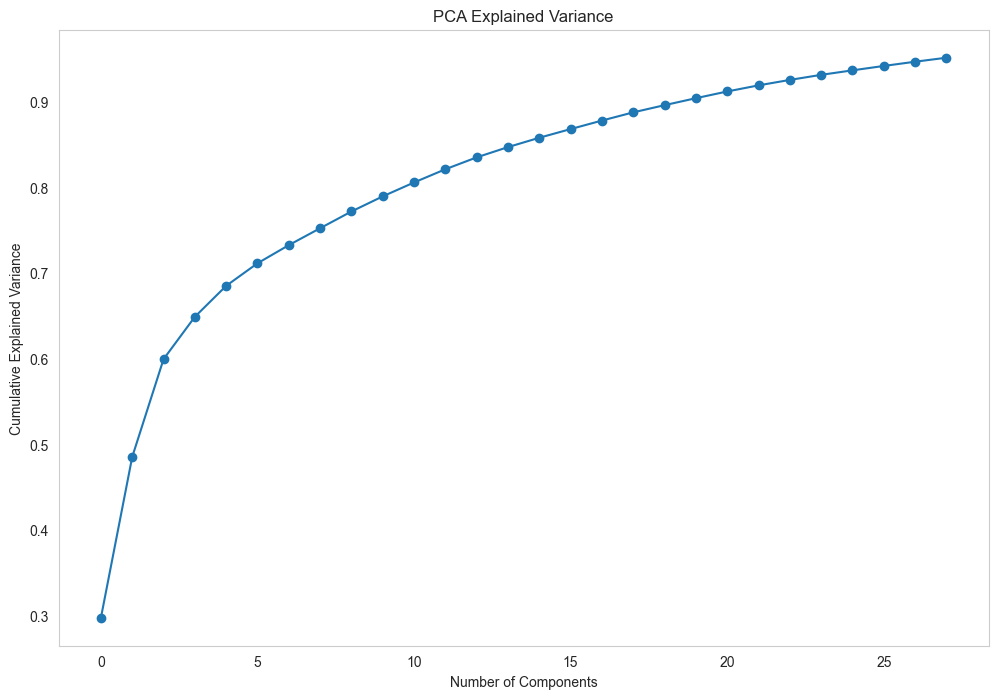

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA after scaling the data
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the number of components
print("Number of PCA components:", pca.n_components_)

# Plot explained variance ratio
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [72]:
model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=66
)
model.fit(X_train_pca, y_train)
y_pred_pca_lr = model.predict(X_test_pca)

# Evaluate
accuracy_pca_lr = accuracy_score(y_test, y_pred_pca_lr)
print("PCA Logistic Regression Accuracy:", accuracy_pca_lr)
cv_scores_pca = cross_val_score(model, X_train_pca, y_train)
pca_scores_mean = cv_scores_pca.mean()
print("PCA Logistic Regression Accuracy:", pca_scores_mean)


PCA Logistic Regression Accuracy: 0.6733333333333333
PCA Logistic Regression Accuracy: 0.6742857142857143


In [73]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=55)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cv_score_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_score_rf)


Random Forest Accuracy: 0.7133333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.89      0.97      0.93        32
           2       0.48      0.85      0.61        26
           3       0.69      0.67      0.68        33
           4       0.74      0.74      0.74        31
           5       0.85      0.68      0.75        34
           6       0.83      0.80      0.81        30
           7       0.90      0.69      0.78        26
           8       0.61      0.71      0.65        24
           9       0.42      0.42      0.42        26

    accuracy                           0.71       300
   macro avg       0.73      0.71      0.71       300
weighted avg       0.74      0.71      0.72       300

Cross-Validation Accuracy: [0.64285714 0.69285714 0.75       0.7        0.67142857]


In [74]:
model_performances = [
    {"Model": "Logistic Regression", "Test Accuracy": accuracy, "Cross-Validation Accuracy": cv_scores.mean()},
    {"Model": "KNN)", "Test Accuracy": knn_accuracy, "Cross-Validation Accuracy": cv_scores_knn.mean()},
    {"Model": "SVM (RBF)", "Test Accuracy": svm_accuracy, "Cross-Validation Accuracy": cv_scores_svm.mean()},
    {"Model": "SVM (Best)", "Test Accuracy": best_svm_accuracy, "Cross-Validation Accuracy": grid_search_svm.best_score_},
    {"Model": "MLP", "Test Accuracy": accuracy_score(y_test, mlp_predictions), "Cross-Validation Accuracy": grid_search_mlp.best_score_},
    {"Model": "Random Forest", "Test Accuracy": accuracy_rf, "Cross-Validation Accuracy": cv_score_rf.mean()}, 
    {"Model": "PCA + Logistic Regression", "Test Accuracy": accuracy_pca_lr, "Cross-Validation Accuracy":pca_scores_mean },  
]
performance_df = pd.DataFrame(model_performances)

# Display the DataFrame
print(performance_df)

                       Model  Test Accuracy  Cross-Validation Accuracy
0        Logistic Regression       0.736667                   0.667143
1                       KNN)       0.650000                   0.641429
2                  SVM (RBF)       0.740000                   0.731429
3                 SVM (Best)       0.766667                   0.737143
4                        MLP       0.726667                   0.725714
5              Random Forest       0.713333                   0.691429
6  PCA + Logistic Regression       0.673333                   0.674286
